In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
data = pd.read_csv("gene_high_throughput_sequencing.csv", index_col='Patient_id')
data.head()

,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
Patient_id,,,,,,,,,,,,,,,,,,,,,
STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,26.329928,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,39.140813,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,48.144685,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,27.076621,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,35.896701,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


In [3]:
data.Diagnosis.value_counts()

early neoplasia    25
normal             24
cancer             23
Name: Diagnosis, dtype: int64

In [4]:
normal = data[data.Diagnosis == 'normal']
normal.shape

(24, 15749)

In [5]:
neopl = data[data.Diagnosis == 'early neoplasia']
neopl.shape

(25, 15749)

In [6]:
cancer = data[data.Diagnosis == 'cancer']
cancer.shape

(23, 15749)

In [7]:
normal_target = normal.Diagnosis
normal_objects = normal.drop('Diagnosis', axis=1)

neopl_target = neopl.Diagnosis
neopl_objects = neopl.drop('Diagnosis', axis=1)

cancer_target = cancer.Diagnosis
cancer_objects = cancer.drop('Diagnosis', axis=1)

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([ 0.93806112,  1.00345108,  1.04538239,  1.08411336,  1.25761416,
          1.28299536,  1.47417351,  1.80186544,  2.06657644,  2.07759652,
          2.23457622,  2.55179993,  2.56187094,  2.61361628,  2.87176665,
          2.97120469,  3.15389961,  3.51583385,  3.55822218,  3.69312835,
          3.94227485,  4.56793106,  4.71782188,  7.36487926])),
 (1.4887457724508069, 2.6812772960416664, 0.94297310117879596))

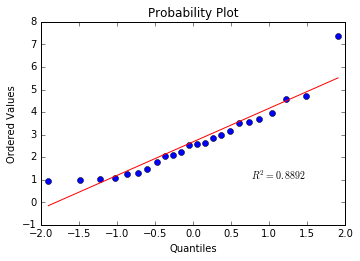

In [9]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
sts.probplot(normal_objects.iloc[:, 0], dist="norm", plot=pylab)

## first part

In [10]:
def write_to_file(filename, answer):
    with open(filename, "w") as f:
        f.write(str(answer))

In [11]:
gens = {}
for x in normal_objects.columns:
    first = sts.ttest_ind(normal_objects[x], neopl_objects[x], equal_var = False)[1]
    second = sts.ttest_ind(neopl_objects[x], cancer_objects[x], equal_var = False)[1]
    gens[x] = (first, second)
    
gens

{'TMC4': (0.38499753777955203, 0.83949890347162004),
 'ARHGEF15': (0.34975328232211966, 0.21882184554547543),
 'DDX11': (0.84676610359758364, 0.62319228253758585),
 'RWDD2A': (0.41410076586154287, 0.95733333639064444),
 'SCAMP4': (0.26591992118339841, 0.50797316505359658),
 'PYCARD': (0.94978611783170031, 3.3284509406881378e-05),
 'VARS2': (0.62645778966837473, 0.43317096007302214),
 'TMTC1': (0.38849190335235673, 0.0005036581986348471),
 'POLD3': (0.66443247518233295, 0.71234562138553992),
 'TMOD2': (0.39616590704081034, 0.40922963026220593),
 'BSPRY': (0.038717976635370036, 0.85243787037050156),
 'ZDHHC5': (0.92966024076621345, 0.19165829755596306),
 'ANKH': (0.0025430597277735566, 0.60949413100830852),
 'FAAH2': (0.0081439873252275915, 0.6089062157421844),
 'SMURF1': (0.80064488153481272, 0.061045499845199906),
 'DNASE2': (0.52674372813876336, 0.81403327774954781),
 'TDRD6': (0.60357946889746628, 0.011078781507642712),
 'KIF3A': (0.23308139131056896, 0.17021573734300963),
 'TMEM86B'

In [12]:
count1 = 0
count2 = 0
for x in gens.items():
    p1 = x[1][0]
    p2 = x[1][1]
    
    if (p1 < 0.05):
        count1 += 1

    if (p2 < 0.05):
        count2 += 1
        
(count1, count2)

(1575, 3490)

In [13]:
write_to_file("stats_answer_1.txt", count1)
write_to_file("stats_answer_2.txt", count2)

## second part

In [14]:
import statsmodels.stats.multitest as smm

In [22]:
p_first = [x[1][0] for x in gens.items()]
p_second = [x[1][1] for x in gens.items()]

reject_first, p_corrected_first, a1_first, a2_first = smm.multipletests(p_first, alpha=0.025, method='holm')

In [23]:
reject_second, p_corrected_second, a1_second, a2_second = smm.multipletests(p_second, alpha=0.025, method='holm')

In [24]:
count1 = 0
count2 = 0
for x, y in zip(p_corrected_first, gens.keys()):
    if x < 0.025:
        c = normal_objects[y].mean()
        t = neopl_objects[y].mean()
        fold = t / c if t > c else c / t
        if abs(fold) > 1.5:
            count1 += 1
        
for x, y in zip(p_corrected_second, gens.keys()):
    if x < 0.025:
        c = neopl_objects[y].mean()
        t = cancer_objects[y].mean()
        fold = t / c if t > c else c / t
        if abs(fold) > 1.5:
            count2 += 1
        
(count1, count2)

(2, 77)

In [25]:
write_to_file("stats_answer_3.txt", count1)
write_to_file("stats_answer_4.txt", count2)

In [26]:
reject_first, p_corrected_first, a1_first, a2_first = smm.multipletests(p_first, alpha=0.025, method='fdr_bh')
reject_second, p_corrected_second, a1_second, a2_second = smm.multipletests(p_second, alpha=0.025, method='fdr_bh')

In [27]:
count1 = 0
count2 = 0
for x, y in zip(p_corrected_first, gens.keys()):
    if x <= 0.025:
        t = normal_objects[y].mean()
        c = neopl_objects[y].mean()
        fold = t / c if t > c else c / t
        if abs(fold) > 1.5:
            count1 += 1
        
for x, y in zip(p_corrected_second, gens.keys()):
    if x <= 0.025:
        t = neopl_objects[y].mean()
        c = cancer_objects[y].mean()
        fold = t / c if t > c else c / t
        if abs(fold) > 1.5:
            count2 += 1
        
(count1, count2)

(4, 524)

In [28]:
write_to_file("stats_answer_5.txt", count1)
write_to_file("stats_answer_6.txt", count2)

# Quiz effectiveness analysis

In [2]:
data = pd.read_csv("churn_analysis.csv")
data.head()

,num,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [3]:
data.churn = data.churn.apply(lambda x: x.strip("."))
data.churn[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: churn, dtype: object

In [4]:
control = data[data.treatment == 1]
control.shape

(1097, 23)

In [5]:
state_unique = control.state.drop_duplicates()
state_unique[:5]

0     KS
3     OH
8     LA
12    IA
17    VT
Name: state, dtype: object

In [6]:
control[control.churn == "False"][control.state == "KS"]

C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,num,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False
179,179,KS,70,408,no,no,0,232.1,122,39.46,...,201.2,112,9.05,0.0,0,0.00,3,1,0.52,False
368,368,KS,132,415,no,no,0,83.4,110,14.18,...,146.7,114,6.60,7.6,5,2.05,1,1,0.56,False
385,385,KS,137,415,no,no,0,230.2,113,39.13,...,204.7,111,9.21,10.7,7,2.89,4,1,0.57,False
451,451,KS,86,408,no,yes,23,225.5,107,38.34,...,245.7,81,11.06,9.8,2,2.65,0,1,0.46,False
620,620,KS,163,415,no,no,0,191.3,89,32.52,...,268.4,121,12.08,12.8,4,3.46,1,1,0.51,False
680,680,KS,116,510,no,no,0,189.5,90,32.22,...,205.8,83,9.26,13.1,2,3.54,1,1,0.58,False
1043,1043,KS,124,415,no,no,0,158.6,104,26.96,...,179.3,104,8.07,10.2,8,2.75,3,1,0.24,False
1066,1066,KS,117,510,no,yes,25,216.0,140,36.72,...,267.9,112,12.06,11.8,4,3.19,0,1,0.24,False
1218,1218,KS,131,415,no,yes,28,249.6,87,42.43,...,239.9,92,10.80,7.6,3,2.05,3,1,0.68,False


In [7]:
tables = []
for x1, i in zip(state_unique[:-1], range(len(state_unique)-1)):
    for x2 in state_unique[i+1:]:
        y1 = "False"
        y2 = "True"
        a = control[control.state == x1][control.churn == y1].shape[0]
        b = control[control.state == x2][control.churn == y1].shape[0]
        c = control[control.state == x1][control.churn == y2].shape[0]
        d = control[control.state == x2][control.churn == y2].shape[0]
        tables.append(np.array([[a, b], [c, d]]))
        
tables[:5]

C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\yuranich\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[array([[18, 22],
        [ 7,  2]]), array([[18, 15],
        [ 7,  0]]), array([[18, 13],
        [ 7,  2]]), array([[18, 18],
        [ 7,  5]]), array([[18, 17],
        [ 7,  5]])]

In [18]:
count = 0
p_chi = []
for subtable in tables:
    chi2 = sts.chi2_contingency(subtable, correction=False)
    p_chi.append(chi2[1])
    if chi2[1] < 0.05:
        count += 1
        
count

34

In [19]:
np.mean(p_chi)

0.50182737987391657

In [21]:
count = 0
p_chi_corr = []
for subtable in tables:
    chi2 = sts.chi2_contingency(subtable, correction=True)
    p_chi_corr.append(chi2[1])
    if chi2[1] < 0.05:
        count += 1
        
count

0

In [22]:
np.mean(p_chi_corr)

0.66405663820510508

In [23]:
count = 0
p_fish = []
for subtable in tables:
    chi2 = sts.fisher_exact(subtable)
    p_fish.append(chi2[1])
    if chi2[1] < 0.05:
        count += 1
        
count

10

In [24]:
np.mean(p_fish)

0.64833830600206677

In [30]:
corr = sts.pearsonr(data.day_calls, data.mes_estim)
corr

(-0.051794350587572625, 0.0027798836869756707)

In [31]:
sts.spearmanr(data.day_calls, data.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


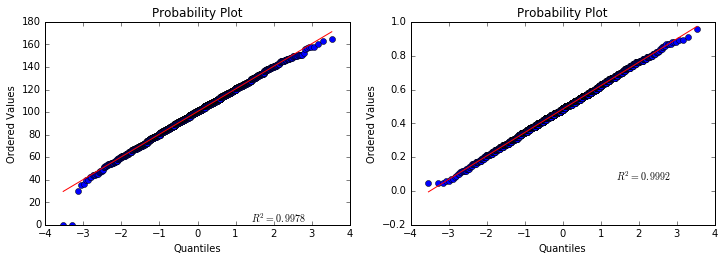

In [35]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
sts.probplot(data.day_calls, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sts.probplot(data.mes_estim, dist="norm", plot=pylab)
pylab.show()

In [38]:
table = pd.crosstab(control.state, control.churn).values
chi2 = sts.chi2_contingency(table)
chi2

(44.052712366925483,
 0.70975900427784411,
 50L,
 array([[ 16.7183227 ,   3.2816773 ],
        [ 25.07748405,   4.92251595],
        [ 13.37465816,   2.62534184],
        [ 15.88240656,   3.11759344],
        [ 12.53874202,   2.46125798],
        [ 18.39015497,   3.60984503],
        [ 25.07748405,   4.92251595],
        [ 15.88240656,   3.11759344],
        [ 14.21057429,   2.78942571],
        [ 16.7183227 ,   3.2816773 ],
        [ 17.55423883,   3.44576117],
        [ 10.86690975,   2.13309025],
        [ 12.53874202,   2.46125798],
        [ 15.04649043,   2.95350957],
        [ 10.03099362,   1.96900638],
        [ 19.2260711 ,   3.7739289 ],
        [ 20.89790337,   4.10209663],
        [ 20.89790337,   4.10209663],
        [ 12.53874202,   2.46125798],
        [ 20.06198724,   3.93801276],
        [ 20.06198724,   3.93801276],
        [ 23.40565178,   4.59434822],
        [ 18.39015497,   3.60984503],
        [ 17.55423883,   3.44576117],
        [ 17.55423883,   3.44576117],
 

In [39]:
n = sum([sum(x) for x in table])
phi_cramera = np.sqrt(chi2[0] / (n))
phi_cramera

0.20039321502033319

In [41]:
count = 0
for i in sum(table, axis=0):
    for j in sum(table, axis=1):
        if float(i*j) / n < 5:
            count += 1
            
float(count) / size(table)

0.4803921568627451

In [42]:
import seaborn

In [46]:
sum(data[data.treatment == 0].churn.apply(lambda x: 1 if x == 'True' else 0))

165L

In [47]:
sum(data[data.treatment == 1].churn.apply(lambda x: 1 if x == 'True' else 0))

180L

In [48]:
sum(data[data.treatment == 2].churn.apply(lambda x: 1 if x == 'True' else 0))

138L

In [49]:
control.shape

(1097, 23)

In [50]:
data[data.treatment == 2].shape

(1103, 23)

In [51]:
data[data.treatment == 0].shape

(1133, 23)

In [53]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sts.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sts.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sts.norm.cdf(z_stat)

In [56]:
data.churn = data.churn.apply(lambda x: 1 if x == 'True' else 0)

0.15642468860508019

In [59]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.treatment == 0].churn, data[data.treatment == 2].churn))

0.15642468860508019

In [57]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.treatment == 0].churn, data[data.treatment == 1].churn))

0.22833116390451069

In [58]:
proportions_diff_z_test(proportions_diff_z_stat_ind(data[data.treatment == 1].churn, data[data.treatment == 2].churn))

0.0093480842944511089

## Quiz AB-testing

In [4]:
data = pd.read_csv("ab_browser_test.csv")
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [5]:
exp = data[data.slot == 'exp']
control = data[data.slot == 'control']

In [47]:
float(sum(exp.n_clicks)) / sum(control.n_clicks) - 1

0.016135689824415822

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [8]:
exp_click = exp.n_clicks.values
control_click = control.n_clicks.values

In [7]:
np.random.seed(0)

exp_median = map(np.median, get_bootstrap_samples(exp_click, 500))
control_median = map(np.median, get_bootstrap_samples(control_click, 500))
exp_mean = map(np.mean, get_bootstrap_samples(exp_click, 500))
control_mean = map(np.mean, get_bootstrap_samples(control_click, 500))

print stat_intervals(exp_median)
print stat_intervals(control_median)
print stat_intervals(exp_mean)
print stat_intervals(control_mean)

[ 5.  5.]
[ 4.  4.]
[ 11.50748109  11.65752157]
[ 11.21392679  11.3570817 ]


In [8]:
delta_median = map(lambda x: x[1] - x[0], zip(exp_median, control_median))
delta_mean = map(lambda x: x[1] - x[0], zip(exp_mean, control_mean))

In [9]:
print stat_intervals(delta_median)
print stat_intervals(delta_mean)

[-1. -1.]
[-0.40031281 -0.18858095]


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


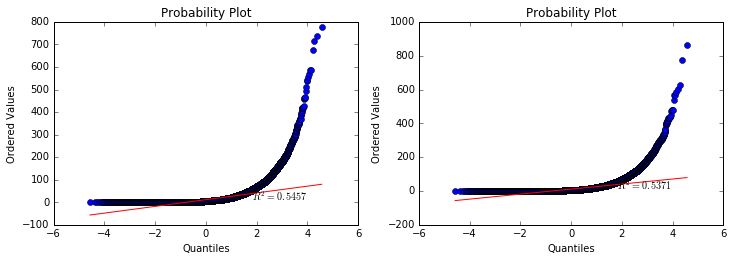

In [11]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
sts.probplot(exp.n_clicks, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sts.probplot(control.n_clicks, dist="norm", plot=pylab)
pylab.show()

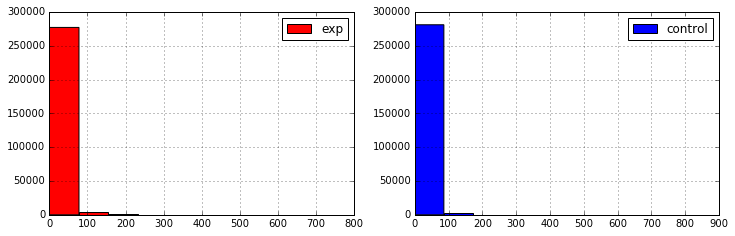

In [49]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
exp.n_clicks.hist(color='r', label='exp')
pylab.legend()
pylab.subplot(2,2,2)
control.n_clicks.hist(color='b', label='control')
pylab.legend()
pylab.show()

In [ ]:
np.random.seed(0)

n_boot_samples = get_bootstrap_samples(control_click, 500)

In [19]:
control_means = map(np.mean, n_boot_samples)
len(control_means)

500

In [20]:
squares = []
for x, y in zip(n_boot_samples, control_means):
    sum_square = sum([(i - y)**2 for i in x])
    squares.append(sum_square)

squares[:5]

[114885027.84454267,
 119162930.90809125,
 118710014.33042586,
 119280983.89520442,
 114100077.50360563]

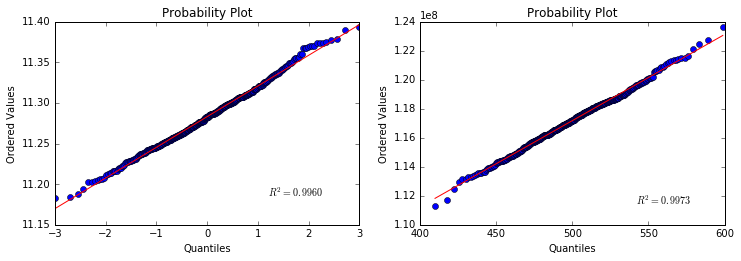

In [22]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
sts.probplot(control_means, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sts.probplot(squares, dist="chi2", sparams=(len(squares)-1), plot=pylab)
pylab.show()

In [27]:
control_clicks = control.groupby('userID').n_clicks.agg(np.sum)
(len(control_clicks), len(control.n_clicks))

(284392, 284554)

In [28]:
exp_clicks = exp.groupby('userID').n_clicks.agg(np.sum)
(len(exp_clicks), len(exp.n_clicks))

(281450, 281580)

In [32]:
from collections import namedtuple
import scipy
MannwhitneyuResult = namedtuple('MannwhitneyuResult', ('statistic', 'pvalue'))
def tiecorrect(rankvals):
    arr = np.sort(rankvals)
    idx = np.nonzero(np.r_[True, arr[1:] != arr[:-1], True])[0]
    cnt = np.diff(idx).astype(np.float64)
    size = np.float64(arr.size)
    return 1.0 if size < 2 else 1.0 - (cnt**3 - cnt).sum() / (size**3 - size)

def mannwhitneyu(x, y, use_continuity=True, alternative=None):
    if alternative is None:
        warnings.warn("Calling `mannwhitneyu` without specifying "
                      "`alternative` is deprecated.", DeprecationWarning)

    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    ranked = scipy.stats.rankdata(np.concatenate((x, y)))
    rankx = ranked[0:n1]  # get the x-ranks
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
    u2 = n1*n2 - u1  # remainder is U for y
    T = tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in mannwhitneyu')
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)

    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative is None or alternative == 'two-sided':
        bigu = max(u1, u2)
    elif alternative == 'less':
        bigu = u1
    elif alternative == 'greater':
        bigu = u2
    else:
        raise ValueError("alternative should be None, 'less', 'greater' "
                         "or 'two-sided'")
    z = (bigu - meanrank) / sd
    if alternative is None:
        # This behavior, equal to half the size of the two-sided
        # p-value, is deprecated.
        p = scipy.stats.distributions.norm.sf(abs(z))
    elif alternative == 'two-sided':
        p = 2 * scipy.stats.distributions.norm.sf(abs(z))
    else:
        p = scipy.stats.distributions.norm.sf(z)
    u = u2
    # This behavior is deprecated.
    if alternative is None:
        u = min(u1, u2)
    return MannwhitneyuResult(u, p)

In [33]:
mannwhitneyu(control_clicks, exp_clicks, alternative='two-sided')

MannwhitneyuResult(statistic=38901259929.0, pvalue=8.6942943775208786e-75)

In [34]:
control.browser.value_counts()

Browser #4     78681
Browser #22    71825
Browser #2     55793
Browser #14    44903
Browser #20    16998
Browser #17    16354
Name: browser, dtype: int64

In [35]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [36]:
p_vals = []
brows = ['Browser #4', 'Browser #22', 'Browser #2', 'Browser #14', 'Browser #20', 'Browser #17']

In [37]:
for x in brows:
    p_vals.append(mannwhitneyu(control[control.browser == x].n_clicks, exp[exp.browser == x].n_clicks, alternative='two-sided')[1])
    
p_vals

[0.81521235316909968,
 0.51481103044200638,
 0.054487720839448202,
 0.0,
 0.90733312777470754,
 0.074801202860216034]

In [38]:
reject, p_corrected, a1, a2 = multipletests(p_vals, alpha = 0.05, method = 'holm')
p_corrected

array([ 1.        ,  1.        ,  0.2724386 ,  0.        ,  1.        ,
        0.29920481])

In [41]:
for x in brows:
    print float(sum(control[control.browser == x].n_nonclk_queries)) / sum(control[control.browser == x].n_queries)*100

46.9709296351
40.5939765935
45.9627471792
57.5904113601
40.5404847434
36.2993667463


In [44]:
for x in brows:
    print float(sum(exp[exp.browser == x].n_nonclk_queries)) / sum(exp[exp.browser == x].n_queries)*100

45.1429419036
39.8539472197
44.9827469486
43.7556173613
38.9773764837
36.9374128487
